Dataset not found. Using sample image.


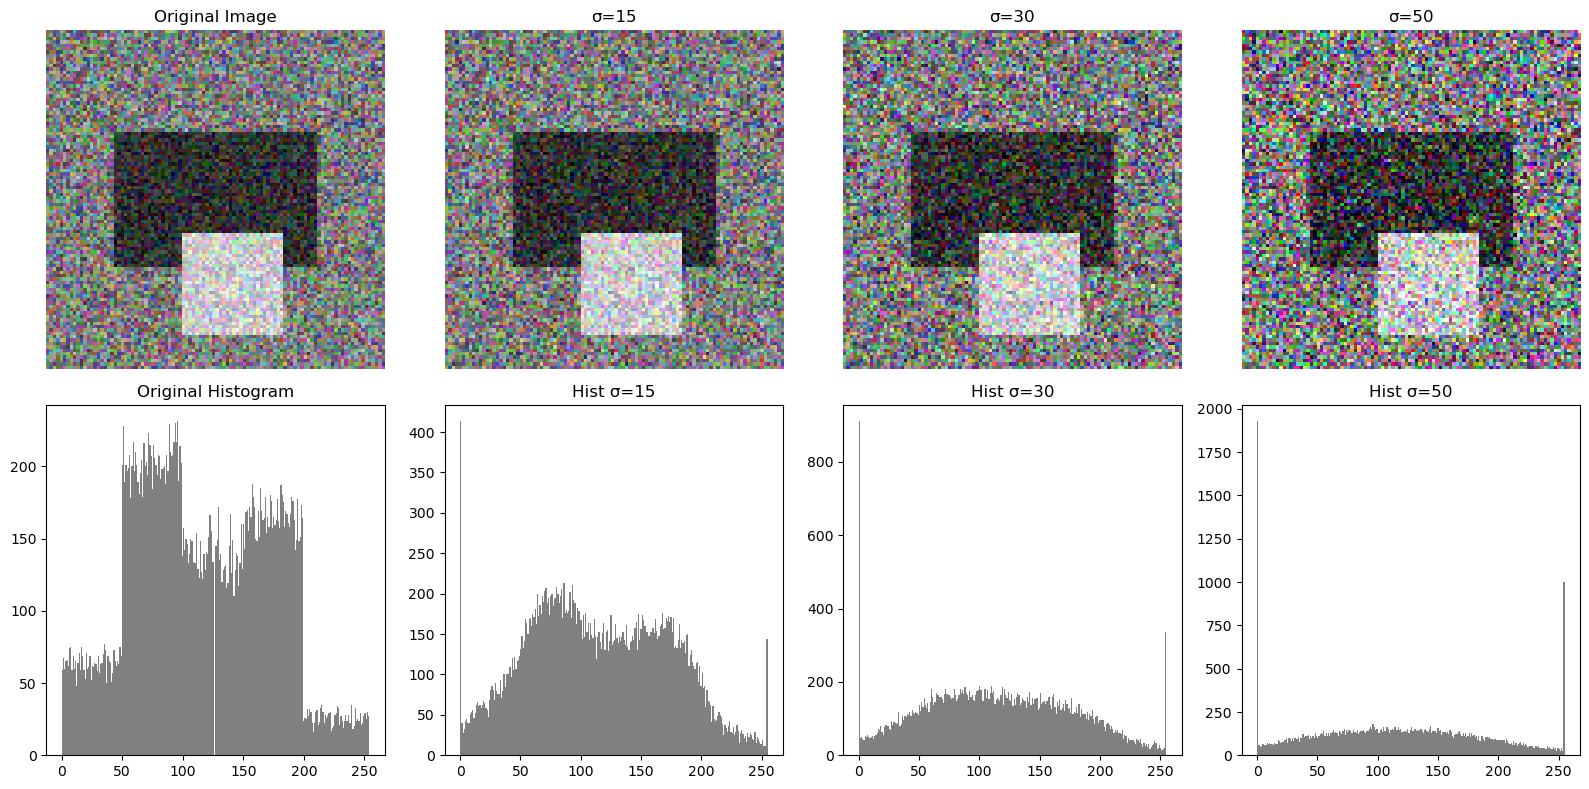


INTERPRETATION:
Increasing σ adds more noise, spreads pixel values, and simulates real-world imperfections.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 1. Simple Gaussian Noise Function
def add_gaussian_noise(image, sigma=25):
    """Add Gaussian noise to an image"""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = np.clip(image.astype(float) + noise, 0, 255)
    return noisy_image.astype(np.uint8)

# 2. Load a real image from your dataset
def load_garbage_image():
    """Try to load an actual garbage image"""
    possible_paths = ["../input/garbage-dataset-classification/Garbage classification"]
    
    for dataset_path in possible_paths:
        if os.path.exists(dataset_path):
            classes = [c for c in os.listdir(dataset_path) 
                      if os.path.isdir(os.path.join(dataset_path, c))]
            if classes:
                class_name = classes[0]
                class_path = os.path.join(dataset_path, class_name)
                images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
                if images:
                    image_path = os.path.join(class_path, images[0])
                    print(f"Loading: {image_path}")
                    return np.array(Image.open(image_path))
    
    print("Dataset not found. Using sample image.")
    return create_sample_image()

def create_sample_image():
    """Create simple sample image"""
    img = np.random.randint(50, 200, (100, 100, 3), dtype=np.uint8)
    img[30:70, 20:80] = np.random.randint(0, 100, (40, 60, 3))  # Dark area
    img[60:90, 40:70] = np.random.randint(150, 255, (30, 30, 3))  # Bright area
    return img

# 3. Simple EDA Visualization
def simple_eda():
    """Visualize Gaussian noise effect with images and histograms"""
    original_img = load_garbage_image()
    noise_levels = [15, 30, 50]
    
    plt.figure(figsize=(16, 8))
    
    # Original Image
    plt.subplot(2, len(noise_levels)+1, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')
    
    # Histogram of original
    plt.subplot(2, len(noise_levels)+1, len(noise_levels)+2)
    plt.hist(original_img.ravel(), bins=256, color='gray')
    plt.title("Original Histogram")
    
    # Noisy images
    for i, sigma in enumerate(noise_levels):
        noisy_img = add_gaussian_noise(original_img, sigma)
        
        # Noisy image
        plt.subplot(2, len(noise_levels)+1, i+2)
        plt.imshow(noisy_img)
        plt.title(f'σ={sigma}')
        plt.axis('off')
        
        # Histogram
        plt.subplot(2, len(noise_levels)+1, len(noise_levels)+3+i)
        plt.hist(noisy_img.ravel(), bins=256, color='gray')
        plt.title(f'Hist σ={sigma}')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*40)
    print("INTERPRETATION:")
    print("="*40)
    print("Increasing σ adds more noise, spreads pixel values, and simulates real-world imperfections.")

# 4. Run the demo
if __name__ == "__main__":
    simple_eda()
